# Technical Project

# Analysis of Electrical Consumption | QUERY PAGE
### Data set: 'Steel Industry Data'

### Ethan Gueck
### April 2024

#### Overview: 
This notebook is intended to provide a format to easily and quickly ask questions of the data and visualize some of the results.

In [6]:
# IMPORTS:

# General Imports.
import pandas as pd # Pandas import.
import matplotlib as mpl # Matplotlib import.
import matplotlib.pyplot as plt # Pyplot import.
import seaborn as sns # Seaborn import.
import numpy as np # Numpy import.

print(plt.style.available)
# SETTINGS:
plt.style.use('dark_background')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [7]:
data = pd.read_csv('Steel_industry_data.csv') # Import the CSV data and assign to data frame (DF). (Ensure CSV is in the same folder as program.)
data['active_power_watts'] = data['Usage_kWh'] * 1000 / 0.25
data['day'] = pd.to_datetime(data['date'], dayfirst=True).dt.day 
data['month'] = pd.to_datetime(data['date'], dayfirst=True).dt.month 
data['year'] = pd.to_datetime(data['date'], dayfirst=True).dt.year 
print(data.columns)

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'active_power_watts', 'day',
       'month', 'year'],
      dtype='object')


In [8]:

def plot_snap_shot(data_input,
                   var,
                   var2,
                   colors = sns.color_palette("BuPu"),
                   filtered_col = "N/A",
                   filter_applied = "N/A"
                   ):
        
        df_grouped_for_ts = data_input.copy()
        df_grouped_for_ts['date'] = pd.to_datetime(df_grouped_for_ts['date'], format='%d/%m/%Y %H:%S') 
        df_grouped_for_ts['month_year'] = df_grouped_for_ts['date'].dt.to_period('M') 
        df_grouped_for_ts = df_grouped_for_ts.groupby('month_year')['active_power_watts'].sum().reset_index()
        df_grouped_for_ts['month_year'] = df_grouped_for_ts['month_year'].astype(str)

        
        print(df_grouped_for_ts)
        color = colors[4]
        var_name = var.name.title().replace('_', ' ')
        var2_name = var2.name.title().replace('_', ' ')
        var_sum_by_var2 = var.groupby(var2).sum()

        var_avg, var_std, var_max, var_min = np.average(var), np.std(var), np.max(var), np.min(var)

        fig = plt.figure(figsize=(12, 8))
        gs = fig.add_gridspec(2, 2, height_ratios=[1.25, 1]) 
        


        plt.suptitle(f'{var_name} Snapshot | Filterd {filtered_col} by {filter_applied}', fontsize=16, y=0.95, color='white')

        ax1 = fig.add_subplot(gs[0, :]) 
        plt.title('Time Series Plot of Active Power (watts)', fontweight='bold', fontsize=12, color=colors[1])
        sns.lineplot(x='month_year', y='active_power_watts', data=df_grouped_for_ts, marker='o')
        plt.xlabel('Date', fontweight='regular', fontsize=11, color=colors[1])
        plt.ylabel('Active Power (watts)', fontweight='regular', fontsize=11, color=colors[1])
        plt.grid(axis='x', alpha=0)
        plt.grid(axis='y', alpha=0.2)
        plt.xticks(rotation=45) 
        plt.subplots_adjust(bottom=-0.2)

        fig.subplots_adjust(hspace=0.3) 
        ax1.axhline(y=250, color='black', linestyle='--', linewidth=1)

        ax2 = fig.add_subplot(gs[1, 0]) 
        plt.title(f'Boxen Plot of {var_name}', fontweight='bold', fontsize=12, color=colors[1])
        sns.boxenplot(y=var, data=data_input, color=color, linewidth=1.5)
        plt.ylabel(var_name, fontweight='regular', fontsize=11, color=colors[1])

        ax3 = fig.add_subplot(gs[1, 1])
        plt.title(f'{var_name} by {var2_name}', fontweight='bold', fontsize=12, color=colors[1])
        plt.pie(var_sum_by_var2, labels=var_sum_by_var2.index, colors=sns.color_palette(colors), autopct='%1.1f%%')
        plt.ylabel('')

        plt.show()
        
        # ____________________________________________


        fig, ax = plt.subplots(figsize=(2, 1))
        text_content = (
            f"Statistics for {var_name}:\n"
            f"Average: {var_avg:.2f}\n"
            f"Std Dev: {var_std:.2f}\n"
            f"Max: {var_max:.2f}\n"
            f"Min: {var_min:.2f}"
        )
        ax.text(0, 0.9, text_content, fontsize=14, color="white", bbox=dict(facecolor='#b7c3c7', alpha=0.5),
                ha='center', va='center')
        ax.axis('off')
        plt.show()


In [9]:
filters_data = ['Day_of_week', 'month', 'year'] # 
filters = [['Monday'], [1,2,3], [2018]]# , 'Tuesday', 'Wednesday','Thursday', 'Friday'] # Must be a list type.
def filteredData(data = data, filters_data = filters_data, filters = filters):
        filtered_data = data.copy()
        for i in range(len(filters_data)):
            filtered_data = filtered_data[filtered_data[filters_data[i]].isin(filters[i])]
        return filtered_data

filtered_data = filteredData()
print(filtered_data.columns)
print(filtered_data.shape)
    

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'active_power_watts', 'day',
       'month', 'year'],
      dtype='object')
(1248, 15)


  month_year  active_power_watts
0    2018-01          76823120.0
1    2018-02          64828200.0
2    2018-03          52505480.0


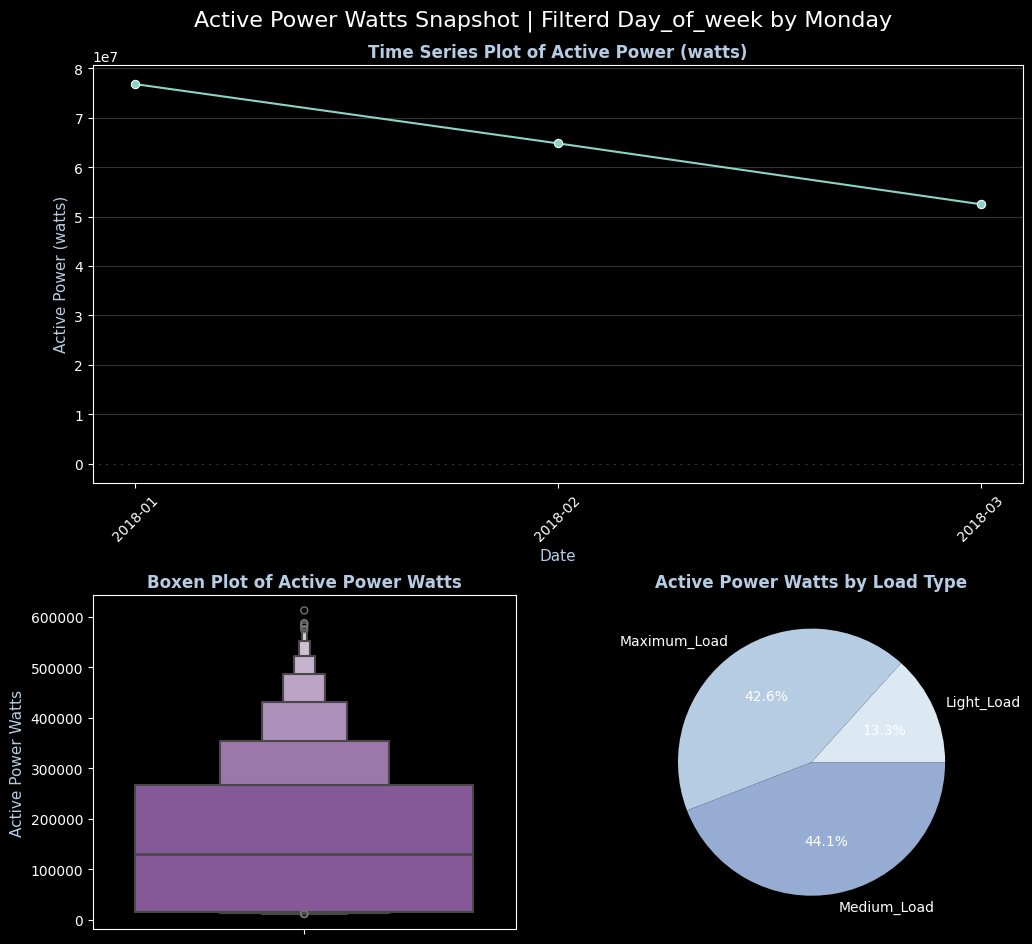

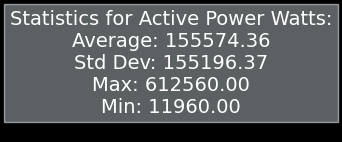

In [10]:
plot_snap_shot(data_input=filtered_data, 
               filtered_col="Day_of_week",  # Example column name, replace with the actual column name
               filter_applied=', '.join(map(str, filters[0][:3])) + "..." if len(filters[0]) > 3 else ', '.join(map(str, filters[0]),),
               var = filtered_data['active_power_watts'],
               var2 = filtered_data['Load_Type']
)